<h3> Overview </h3>
Tune hyperparameters of logistic regression model. <br>
Then evaluate the models. 

Working with following 4 datasets: 

white_wine_trans_5Q <br>
red_wine_trans_5Q <br>

white_wine_trans_3Q <br>
red_wine_trans_3Q <br>


Resampling is also attempted, using SMOTE, but this does not improve evaluation metrics scores. <br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix, f1_score, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier

import warnings

In [2]:
warnings.filterwarnings('ignore')

<h1> Import Transformed Data </h1>

<h2> 5 Quality Labels </h2>

<h3> White Wine </h3>

In [3]:
white_wine_trans_5Q = pd.read_csv('../transformed_wine_data/white_wine_trans_5Q.csv')

In [4]:
X_white = white_wine_trans_5Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_5Q['quality_label']

In [5]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

In [6]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [7]:
# Create base log reg model
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

penalty = ['l1', 'l2']
C = np.linspace(0.001,100,10)

param_grid = {'penalty': penalty, 'C': C}

#grid_model = RandomizedSearchCV(log_model,param_distributions=param_grid, n_iter = 10)
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [8]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.0000e-03, 1.1112e+01, 2.2223e+01, 3.3334e+01, 4.4445e+01,
       5.5556e+01, 6.6667e+01, 7.7778e+01, 8.8889e+01, 1.0000e+02]),
                         'penalty': ['l1', 'l2']})

In [9]:
grid_model.best_params_

{'C': 66.667, 'penalty': 'l1'}

In [10]:
y_pred = grid_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        54
         low       0.00      0.00      0.00        55
lower_middle       0.59      0.57      0.58       437
      middle       0.53      0.76      0.63       660
upper_middle       0.48      0.18      0.26       264

    accuracy                           0.54      1470
   macro avg       0.32      0.30      0.29      1470
weighted avg       0.50      0.54      0.50      1470



Text(0.5, 1.0, 'logistic regression – white wine – 5 labels')

<Figure size 432x288 with 0 Axes>

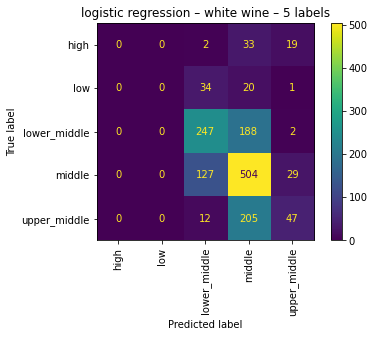

In [11]:
plt.figure()
plot_confusion_matrix(grid_model, scaled_X_test, y_test)
plt.xticks(rotation = 90)
plt.title('logistic regression – white wine – 5 labels')


<h3> 5 Quality Labels – White Wine – with Resampling (through SMOTE) </h3>

In [12]:
white_wine_trans_5Q = pd.read_csv('../transformed_wine_data/white_wine_trans_5Q.csv')

In [13]:
X_white = white_wine_trans_5Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_5Q['quality_label']

In [14]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

In [15]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
y_train.value_counts()

middle          1538
lower_middle    1020
upper_middle     616
low              128
high             126
Name: quality_label, dtype: int64

In [17]:
# Undersample from majority classes; undersample from minority classes

under_strategy_white = {'middle': 900, 'lower_middle': 900, 'upper_middle': 600, 'low': 128, 'high': 126}
over_strategy_white = {'middle': 900, 'lower_middle': 900, 'upper_middle': 800, 'low': 400, 'high': 400}

under_white = RandomUnderSampler(sampling_strategy = under_strategy_white)
over_white = SMOTE (sampling_strategy = over_strategy_white)

scaled_X_train, y_train = under_white.fit_resample(scaled_X_train, y_train)
scaled_X_train, y_train = over_white.fit_resample(scaled_X_train, y_train)

In [18]:
y_train.value_counts()

lower_middle    900
middle          900
upper_middle    800
high            400
low             400
Name: quality_label, dtype: int64

In [19]:
# Create log reg model
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

penalty = ['l1', 'l2']
C = np.linspace(0.001,100,10)

param_grid = {'penalty': penalty, 'C': C}

#grid_model = RandomizedSearchCV(log_model,param_distributions=param_grid, n_iter = 10)
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [20]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.0000e-03, 1.1112e+01, 2.2223e+01, 3.3334e+01, 4.4445e+01,
       5.5556e+01, 6.6667e+01, 7.7778e+01, 8.8889e+01, 1.0000e+02]),
                         'penalty': ['l1', 'l2']})

In [21]:
grid_model.best_params_

{'C': 22.223, 'penalty': 'l2'}

In [22]:
y_pred = grid_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.05      0.02      0.03        54
         low       0.28      0.36      0.32        55
lower_middle       0.52      0.67      0.58       437
      middle       0.58      0.32      0.41       660
upper_middle       0.36      0.63      0.46       264

    accuracy                           0.47      1470
   macro avg       0.36      0.40      0.36      1470
weighted avg       0.49      0.47      0.45      1470



Text(0.5, 1.0, 'logistic regression – white wine – 5 labels')

<Figure size 432x288 with 0 Axes>

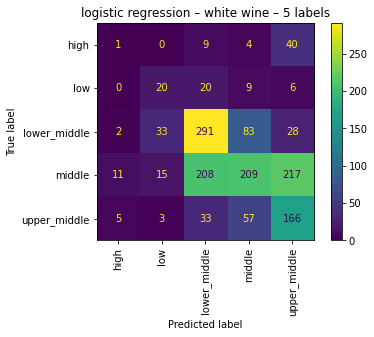

In [23]:
plt.figure()
plot_confusion_matrix(grid_model, scaled_X_test, y_test)
plt.xticks(rotation = 90)
plt.title('logistic regression – white wine – 5 labels')


<h2> 3 Quality Labels </h2>

<h3> White Wine </h3>

In [24]:
white_wine_trans_3Q = pd.read_csv('../transformed_wine_data/white_wine_trans_3Q.csv')

In [25]:
X_white = white_wine_trans_3Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_3Q['quality_label']

In [26]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

In [27]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [28]:
# Create base log reg model
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

penalty = ['l1', 'l2']
C = np.linspace(0.001,2,10)

param_grid = {'penalty': penalty, 'C': C}

#grid_model = RandomizedSearchCV(log_model,param_distributions=param_grid, n_iter = 10)
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [29]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e-03, 2.23111111e-01, 4.45222222e-01, 6.67333333e-01,
       8.89444444e-01, 1.11155556e+00, 1.33366667e+00, 1.55577778e+00,
       1.77788889e+00, 2.00000000e+00]),
                         'penalty': ['l1', 'l2']})

In [30]:
grid_model.best_params_

{'C': 0.22311111111111112, 'penalty': 'l1'}

Best params: <br>
C: 0.223 <br>
penalty: l1

In [31]:
y_pred = grid_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.59      0.29      0.39       318
         low       0.64      0.59      0.61       492
      medium       0.52      0.68      0.59       660

    accuracy                           0.57      1470
   macro avg       0.58      0.52      0.53      1470
weighted avg       0.58      0.57      0.55      1470



Text(0.5, 1.0, 'logistic regression – white wine – 3 labels')

<Figure size 432x288 with 0 Axes>

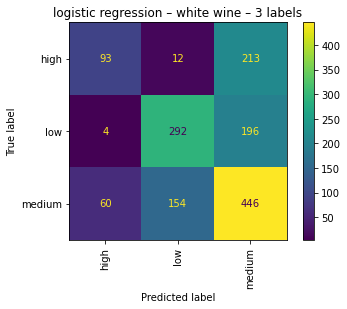

In [32]:
plt.figure()
plot_confusion_matrix(grid_model, scaled_X_test, y_test)
plt.xticks(rotation = 90)
plt.title('logistic regression – white wine – 3 labels')


<h2> 3 Quality Labels – White Wine – With SMOTE </h2>

In [33]:
white_wine_trans_3Q = pd.read_csv('../transformed_wine_data/white_wine_trans_3Q.csv')

In [34]:
X_white = white_wine_trans_3Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_3Q['quality_label']

In [35]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

In [36]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [37]:
y_train.value_counts()

medium    1538
low       1148
high       742
Name: quality_label, dtype: int64

In [38]:
under_strategy_white = {'medium': 1000, 'low': 1000, 'high': 742}
over_strategy_white = {'medium': 1000, 'low': 1000, 'high': 1000}

under_white = RandomUnderSampler(sampling_strategy = under_strategy_white)
over_white = SMOTE (sampling_strategy = over_strategy_white)

scaled_X_train, y_train = under_white.fit_resample(scaled_X_train, y_train)
scaled_X_train, y_train = over_white.fit_resample(scaled_X_train, y_train)

In [39]:
# Create base log reg model
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

penalty = ['l1', 'l2']
C = np.linspace(0.001,100,10)

param_grid = {'penalty': penalty, 'C': C}

#grid_model = RandomizedSearchCV(log_model,param_distributions=param_grid, n_iter = 5)
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [40]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.0000e-03, 1.1112e+01, 2.2223e+01, 3.3334e+01, 4.4445e+01,
       5.5556e+01, 6.6667e+01, 7.7778e+01, 8.8889e+01, 1.0000e+02]),
                         'penalty': ['l1', 'l2']})

In [41]:
grid_model.best_params_

{'C': 11.111999999999998, 'penalty': 'l1'}

In [42]:
y_pred = grid_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.43      0.76      0.55       318
         low       0.56      0.73      0.64       492
      medium       0.58      0.24      0.34       660

    accuracy                           0.52      1470
   macro avg       0.53      0.58      0.51      1470
weighted avg       0.54      0.52      0.48      1470



Text(0.5, 1.0, 'logistic regression – white wine – 3 labels')

<Figure size 432x288 with 0 Axes>

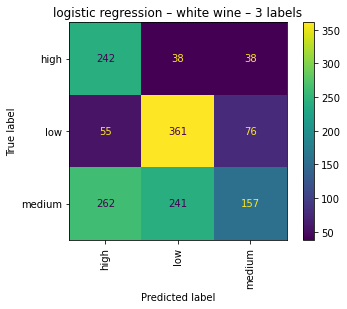

In [43]:
plt.figure()
plot_confusion_matrix(grid_model, scaled_X_test, y_test)
plt.xticks(rotation = 90)
plt.title('logistic regression – white wine – 3 labels')
